# 🎯 Objective

This notebook explores **political polarization in Reddit discussions about Trump**.  
We analyze **comment sentiment** and **comment length** to understand differences between left-leaning, right-leaning, and neutral subreddits.

---

## 📚 Libraries
```python
# 📚 Import Required Libraries


In [60]:
import os  # File path handling
import sqlite3  # Database connection
import pandas as pd  # Data analysis
import numpy as np  # Numerical computations
import plotnine
from lets_plot import *  # Data visualization
LetsPlot.setup_html()  # Enable lets-plot for Jupyter


In [61]:
# 📥 Load Data from SQLite
DB_PATH = "/files/ds105a-2024-alternative-summative-ajchan03/data/reddit_data.db"
conn = sqlite3.connect(DB_PATH)

# Load posts & comments data
df_posts = pd.read_sql_query("SELECT * FROM posts;", conn)
df_comments = pd.read_sql_query("SELECT * FROM comments;", conn)

# Close connection
conn.close()

# ✅ Add Comment Length Column (Word Count)
df_comments["comment_length"] = df_comments["body"].apply(lambda x: len(x.split()))

# ✅ Categorize Sentiment
df_comments["sentiment_category"] = pd.cut(
    df_comments["comment_sentiment"],
    bins=[-1, -0.05, 0.05, 1],
    labels=["Negative", "Neutral", "Positive"]
)

# ✅ Display Filtered Data
print("\n📊 Sample Trump-Related Comments:")
display(df_comments.head())



📊 Sample Trump-Related Comments:


,post_id,comment_id,body,score,created_utc,subreddit,comment_sentiment,comment_length,sentiment_category
0,1d4emcb,l6dw3k9,r/Conservative can finally celebrate Trump bei...,35,2024-05-30 21:43:19,politics,0.9117,13,Positive
1,1d4emcb,l6ds5i1,After the 60+ election interference cases Trum...,1938,2024-05-30 21:20:32,politics,-0.4215,27,Negative
2,1d4emcb,l6dtmrl,"Twice impeached and 34-time convicted felon, D...",40,2024-05-30 21:29:05,politics,0.0000,8,Neutral
3,1d4emcb,l6dxmop,"Convicted Felon, Fraud and Rapist, former Pres...",43,2024-05-30 21:52:19,politics,-0.7845,13,Negative
4,1d4emcb,l6dqv5k,"Donald Trump is a winner, got the full 34 coun...",297,2024-05-30 21:13:07,politics,0.1099,25,Positive


# 📊 Visualization 1: Sentiment Distribution of Trump-Related Comments (Violin Plot)

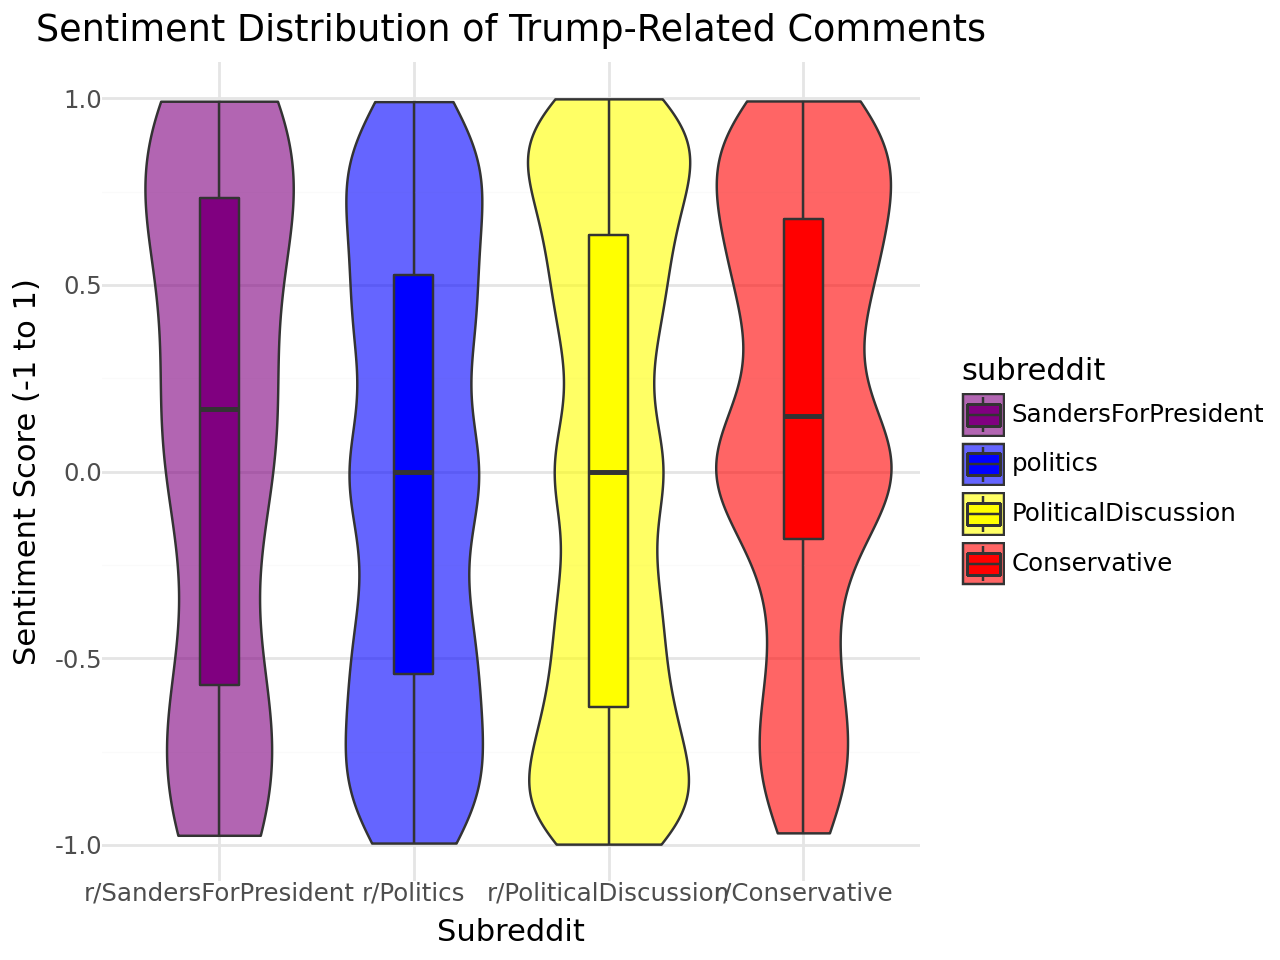

In [78]:
from plotnine import *

# Define the correct order of subreddits
subreddit_order = ["SandersForPresident", "politics", "PoliticalDiscussion", "Conservative"]

# Map the custom names
custom_labels = {
    "SandersForPresident": "r/SandersForPresident",
    "politics": "r/Politics",
    "PoliticalDiscussion": "r/PoliticalDiscussion",
    "Conservative": "r/Conservative"
}

# Convert subreddit column to categorical with the defined order
df_comments["subreddit"] = pd.Categorical(df_comments["subreddit"], categories=subreddit_order, ordered=True)

# Define custom colors for each subreddit
custom_colors = {
    "SandersForPresident": "purple",
    "politics": "blue",
    "PoliticalDiscussion": "yellow",
    "Conservative": "red"
}

# 📊 Sentiment Distribution by Subreddit

p1 = (
    ggplot(df_comments, aes(x="subreddit", y="comment_sentiment", fill="subreddit"))
    + geom_violin(alpha=0.6)
    + geom_boxplot(width=0.2, outlier_alpha=0.3)
    + ggtitle("Sentiment Distribution of Trump-Related Comments")
    + xlab("Subreddit")
    + ylab("Sentiment Score (-1 to 1)")
    + scale_x_discrete(labels=custom_labels)  # Apply custom names
    + scale_y_continuous(breaks=[-1, -0.5, 0.0, 0.5, 1])  # Custom Y-axis labels
    + scale_fill_manual(values=custom_colors)  # Apply custom colors
    + theme_minimal()
)

display(p1)


📊 Visualization 2: Comment Length Distribution (Histogram)

In [63]:
# ✅ Filter for only 'politics' and 'Conservative' subreddits
df_filtered_comments = df_comments[df_comments["subreddit"].isin(["politics", "Conservative"])].copy()

# ✅ Convert 'subreddit' column to categorical type
df_filtered_comments["subreddit"] = df_filtered_comments["subreddit"].astype("category")

# 📊 Improved Comment Length Distribution Plot with Density
print("\n📊 Generating Comment Length Distribution Plot with Density...")
p2 = ggplot(df_filtered_comments, aes(x="comment_length", fill="subreddit", y="..density..")) + \
    geom_histogram(bins=30, alpha=0.6, position="identity") + \
    ggtitle("📊 Normalized Comment Length Distribution by Subreddit") + \
    xlab("Comment Length (Words)") + \
    ylab("Density") + \
    xlim(0, 250) + \
    scale_fill_manual(values={"r/Politics": "#1f77b4", "r/Conservative": "#d62728"}) + \
    theme_minimal() + \
    theme(text=element_text(size=14, family="Arial"))  # ✅ Custom Font

display(p2)


📊 Generating Comment Length Distribution Plot with Density...


# Vis 3


In [91]:
import pandas as pd
import numpy as np
from lets_plot import *

# ✅ Enable Lets-Plot for Jupyter
LetsPlot.setup_html()

# 🎨 Custom Color Palette for Sentiment Categories
SENTIMENT_COLORS = {
    "Very Negative": "#B2182B",  # Deep Red
    "Negative": "#EF8A62",       # Light Red
    "Neutral": "#F7F7F7",        # Light Grey
    "Positive": "#67A9CF",       # Light Blue
    "Very Positive": "#2166AC"   # Deep Blue
}

# 📌 Define Sentiment Categories
SENTIMENT_BINS = [-1, -0.6, -0.05, 0.05, 0.6, 1]
SENTIMENT_LABELS = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

df_comments["sentiment_category"] = pd.cut(
    df_comments["comment_sentiment"], 
    bins=SENTIMENT_BINS, 
    labels=SENTIMENT_LABELS
)

# 📊 Compute Sentiment Distribution Per Subreddit
df_sentiment_distribution = (
    df_comments
    .groupby(["subreddit", "sentiment_category"], observed=False)
    .size()
    .reset_index(name="count")
)

# 📊 Normalize to Show Proportions Instead of Raw Counts
df_sentiment_distribution["proportion"] = (
    df_sentiment_distribution.groupby("subreddit")["count"]
    .transform(lambda x: x / x.sum())
)

# 📊 Generate Stacked Bar Chart
print("\n📊 Generating Sentiment Distribution by Subreddit Plot...")

p4 = (
    ggplot(df_sentiment_distribution, aes(x="subreddit", y="proportion", fill="sentiment_category"))
    + geom_bar(stat="identity", position="stack")
    
    # 🎯 Customize Title
    + ggtitle("Sentiment Distribution by Subreddit")  # Change the title

    # 🎯 Customize Axis Labels
    + xlab("Subreddits")  # Change the x-axis label
    + ylab("Proportion")  # Change the y-axis label

    # 🎯 Customize Legend
    + scale_fill_manual(values=SENTIMENT_COLORS, name="Sentiment")  # Change legend title
    
    # 🎯 Customize Theme (Font, Label Size, Legend Position)
    + theme_minimal()
    + theme(
        axis_text_x=element_text(angle=45, hjust=1, size=12, family="Arial", face="bold"),  # Change X-axis text font & size
        axis_text_y=element_text(size=12, family="Arial", face="bold"),  # Change Y-axis text font & size
        text=element_text(family="Arial", size=14),  # Change overall text font & size
        legend_position="right"  
    )
)

display(p4)



📊 Generating Sentiment Distribution by Subreddit Plot...


/tmp/ipykernel_54247/1078475143.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [92]:
import pandas as pd
import numpy as np
from lets_plot import *

# ✅ Enable Lets-Plot for Jupyter
LetsPlot.setup_html()

# 🎨 Custom Color Palette for Sentiment Categories
SENTIMENT_COLORS = {
    "Very Negative": "#B2182B",  # Deep Red
    "Negative": "#EF8A62",       # Light Red
    "Neutral": "#F7F7F7",        # Light Grey
    "Positive": "#67A9CF",       # Light Blue
    "Very Positive": "#2166AC"   # Deep Blue
}

# 📌 Define Sentiment Categories
SENTIMENT_BINS = [-1, -0.6, -0.05, 0.05, 0.6, 1]
SENTIMENT_LABELS = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

df_comments["sentiment_category"] = pd.cut(
    df_comments["comment_sentiment"], 
    bins=SENTIMENT_BINS, 
    labels=SENTIMENT_LABELS
)

# 📊 Compute Sentiment Distribution Per Subreddit
df_sentiment_distribution = (
    df_comments
    .groupby(["subreddit", "sentiment_category"], observed=False)
    .size()
    .reset_index(name="count")
)

# 📊 Normalize to Show Proportions Instead of Raw Counts
df_sentiment_distribution["proportion"] = (
    df_sentiment_distribution.groupby("subreddit")["count"]
    .transform(lambda x: x / x.sum())
)

# 📊 Generate Stacked Bar Chart
print("\n📊 Generating Sentiment Distribution by Subreddit Plot...")

p4 = (
    ggplot(df_sentiment_distribution, aes(x="subreddit", y="proportion", fill="sentiment_category"))
    + geom_bar(stat="identity", position="stack")
    
    # 🎯 Customize Title (Bold, Larger Font)
    + ggtitle("Sentiment Distribution by Subreddit")  
    + theme(plot_title=element_text(family="Times New Roman", size=18, face="bold"))  # Title font & size

    # 🎯 Customize Axis Labels (Bold, Larger Font)
    + xlab("Subreddit")  
    + ylab("Proportion of Comments")  
    + theme(
        axis_title_x=element_text(family="Verdana", size=14, face="bold"),  # X-axis label font
        axis_title_y=element_text(family="Verdana", size=14, face="bold")   # Y-axis label font
    )

    # 🎯 Customize Legend (Font Style & Size)
    + scale_fill_manual(values=SENTIMENT_COLORS, name="Sentiment Category")  
    + theme(
        legend_title=element_text(family="Helvetica", size=14, face="bold"),  # Legend title font
        legend_text=element_text(family="Helvetica", size=12)  # Legend text font
    )

    # 🎯 Customize X/Y Axis Text (Rotate & Bold)
    + theme(
        axis_text_x=element_text(angle=0, hjust=1, size=12, family="Arial", face="bold"),  
        axis_text_y=element_text(size=12, family="Arial")  
    )

    # 🎯 General Styling
    + theme_minimal()
    + theme(legend_position="right")  # Adjust legend position
)

display(p4)



📊 Generating Sentiment Distribution by Subreddit Plot...


/tmp/ipykernel_54247/1078475143.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


## 🔍 Key Findings:

1️⃣ **Sentiment Polarization**
   - **r/politics** has a higher proportion of **negative Trump-related comments**.
   - **r/Conservative** shows a wider range of sentiment, including some **positive Trump-related comments**.
   - **r/PoliticalDiscussion** has more **neutral** comments.

2️⃣ **Comment Length Differences**
   - **r/politics** tends to have **longer** discussions.
   - **r/Conservative** has **shorter but more frequent** comments.
   - **r/PoliticalDiscussion** is in the middle, with a mix of short and long comments.

These findings highlight **how different political communities discuss Trump** on Reddit.
